# How to work with scanpy objects and single-cell data
### Cell Discovery Network at Boston Childrens Hospital
### Author: Rose Hedderman  
### Feb 14, 2024

## Introduction  
In this vignette, we are going to use scanpy to analyze single-cell RNA data. 
Scanpy single-cell RNA objects are called AnnData objects and are comparable to Seurat objects in R. 

By the end of this vignette, we will have learned how to:
1. Learn the basics of Python   
2. Learn the basics of the [Scanpy library](https://scanpy.readthedocs.io/en/stable/index.html)
3. Load single-cell data
4. Understand the Anndata objects and its structure
5. Access cell metadata
6. Combine Anndata objects
7. Access gene expression data
8. Visualize the data (PCA & UMAP)
9. Filter and subset adata objects

## 1. Intro to Python  
A "!" is used in front of a statement in a Jupyter notebook whenever the statement is written for the terminal. "!" is a way of accessing the terminal from your notebook without having to leave your file.

In [2]:
# To know what folder you are working in
## pwd: present working directory
!pwd

In [3]:
# To list the files in the current directory
## ls: list files
!ls

In [4]:
# To navigate to a different directory
## cd: change directory
!cd ./new-directory-name

## 2. Intro to Scanpy  
[Scanpy](https://scanpy.readthedocs.io/en/stable/api.html) is a python library (or python extension) built to help you analyze single-cell RNA seq data. It is the largest available library for coding in python and python is advantageous over R in:
- speed when analyzing really large datasets
- integration with other functions in Python
- scaling analysis to use other methods such as machine learning.

In [256]:
# To install scanpy, run this command once and then comment it out
# !pip install scanpy

In [2]:
# To access installed packages or refernce functions in other files in your current workspace, you can use the import command
# NOTE: The syntax "package as pg" allows you to refer to the package as "pg" in your code.

import scanpy as sc     # scanpy for scRNA-seq analysis
import pandas as pd     # pandas for data frame building and manipulation
import os               # os for file navigation
import random           # random as a math function to set a random seed
import session_info     # session_info to record the session information
import numpy as np      # numpy for numerical operations

# Set seed to make the results reproducible
random.seed(123)

# Set basic settiings for scanpy figures
sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    # color_map="YlGnBu",
    frameon=False,
)
# Reduce output by turning off warnings
import warnings
warnings.filterwarnings('ignore')

NOTE: A common error message to receive when running the code is "ModuleNotFoundError: No module named 'scanpy'".  
To install the package and fix this error, you can use the command *!pip install scanpy* or *!conda install -c conda-forge scanpy*.
This goes for all packages, not just scanpy.

## 3. Load data   
Pull data from publicly available datasets PBMC3K Processed and PBMC68L Reduced. PBMCs are peripheral blood mononuclear cells with subtypes of T cells, monocytes/macrophages, B cells, and NK cells.

**The full scanpy API with functions and descriptions of those functions can be found [here](https://scanpy.readthedocs.io/en/stable/api.html).**  

If you're loading your own data, use *sc.read_10x_h5()* or *sc.read_h5ad()* to read in the data.
Ex: adata = sc.read_10x_h5("./path_name/file_name.h5")

In [3]:
# Scanpy has built-in datasets that are loaded as Anndata objects. To pull them, the datasets module is used.
# First, we'll pull the PBMC3k (unprocessed) dataset.
pbmc3k = sc.datasets.pbmc3k()

# Writing a variable name in the last line of a cell will display the variable's value.
pbmc3k


AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [4]:
# Load paul15 dataset of myeloid progenitors
paul = sc.datasets.paul15()
paul

AnnData object with n_obs × n_vars = 2730 × 3451
    obs: 'paul15_clusters'
    uns: 'iroot'

## 4. What is an Anndata object? What does "n_obs x n_vars" mean?
An Anndata object, often abbreviated to "adata", is a sparse matrix representing cells (observations) by genes (variables). The sparse matrix contains the gene expression matrix which represents the number of genes in each cell - where each cell is a row and the columns are genes. The figure below can help visualize this concept.  

Additionally, the metadata (or extra information) associated with each cell or each gene is found in Series objects associated with the obs or vars. It is important to label this information early in the analysis so the metadata is readily available for a subset of cells or genes you might want to inspect.  

<img src="https://raw.githubusercontent.com/scverse/anndata/main/docs/_static/img/anndata_schema.svg" width="500"/>


## 5. Accessing cell-associated metadata
Let's look at the metadata at a cell level for both Anndata objects, *pbmc3k* and *paul*.  

Metadata at a cell level can look like the number of genes expressed in the cell (n_genes), or the cell-type the cell has been annotated as (paul15_clusters).

To access a specific metadata column such as the number of genes in each cell in the PBMC3k dataset, call the variable in quotations in brackets.

In [5]:
paul.obs["paul15_clusters"]

0         7MEP
1         15Mo
2         3Ery
3         15Mo
4         3Ery
         ...  
2725      2Ery
2726    13Baso
2727      7MEP
2728      15Mo
2729      3Ery
Name: paul15_clusters, Length: 2730, dtype: category
Categories (19, object): ['1Ery', '2Ery', '3Ery', '4Ery', ..., '16Neu', '17Neu', '18Eos', '19Lymph']

To subset the dataframe *pbmc3k.obs*, slice a portion of the dataframe
by putting brackets at the end of the variable name and specifying the rows and columns you want to keep.

**Example:** To slice the first 5 rows of pbmc3k.obs: *pbmc3k.obs[:5]*  or  *pbmc3k.obs.head()*  or  *pbmc3k.obs[0:5]*.  
**Example:** To slice the 5th through 10th rows of pbmc3k.obs: *pbmc3k.obs[5:10]*.  
**Example:** To slice the last 5 rows of pbmc3k.obs: *pbmc3k.obs[-5:]*  or  *pbmc3k.obs.tail()*  or  *pbmc3k.obs[-5:]*.  

In [6]:
pbmc3k.obs[:5]

""
index
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1


In [7]:
# To list all possible cell metadata variables, I use the columns function
## NOTE: If you're using your own data, it's possible you won't have many or any columns in the obs or var attributes.
# paul
paul.obs.columns

Index(['paul15_clusters'], dtype='object')

In [8]:
# Look at the first 5 variables in the paul15 data
paul.obs.head()

,paul15_clusters
0,7MEP
1,15Mo
2,3Ery
3,15Mo
4,3Ery


### Useful functions:
value_counts(): prints the discrete counts for each variable in a column  
is_na() - checks for missing values  
sum() - sums the number of values  

In [10]:
# value_counts()
paul.obs["paul15_clusters"].value_counts()

paul15_clusters
14Mo       373
2Ery       329
13Baso     300
3Ery       246
15Mo       186
5Ery       180
6Ery       173
7MEP       167
16Neu      164
10GMP      153
4Ery       124
12Baso      69
8Mk         68
9GMP        63
1Ery        43
19Lymph     31
11DC        30
17Neu       22
18Eos        9
Name: count, dtype: int64

In [11]:
# is_na() and sum()
paul.obs["paul15_clusters"].isna().sum()

0

All cell clusters are labeled in the Paul15 dataset.

## 6. Merging the datasets  
To merge Anndata, or "adata", objects, use the *anndata.concat()* function. Specifying the parameter *join="outer"* tells the function to include all data on both sides. This ensures no loss of information in the merge.

Before a merge - make sure there is no confusion of information between the two datasets either. Sometimes columns in different datasets can have the same name but hold different types of information.  

In [12]:
# Initialize a new column 'dataset' in the obs attribute
pbmc3k.obs['dataset'] = "pbmc3k"
paul.obs['dataset'] = "paul15"

Recommendation: Check the shape of the two objects you're merging before and after the merge to ensure proper transfer of data.

In [13]:
# check shapes
print(pbmc3k.shape)
print(paul.shape)

(2700, 32738)
(2730, 3451)


In [14]:
import anndata as ad
merged = ad.concat([pbmc3k, paul], join='outer', label='dataset')
merged

AnnData object with n_obs × n_vars = 5430 × 36179
    obs: 'dataset', 'paul15_clusters'

## 7. Gene Expression Data  
There's a couple steps to correctly look at gene expression data.
1. The first step in looking at gene expression data is to make sure the variable names in the adata object are unique.
2. Then copy and store the original data into a "counts" layer so the original data isn't overwritten when the data is normalized.
3. Label genes if they are mitchondrial, ribosomal, or hemoglobin and store in *merged.var*.
4. Calculate the QC (or quality control) metrics through scnapy's *sc.pp.calculate_qc_metrics()* function. 
5. Normalize the data and add a layer for the normlized data *merged.layers["log1p_norm"]*.  

In [15]:
# 1 - Make sure the gene names are unique
merged.var_names_make_unique()
merged

AnnData object with n_obs × n_vars = 5430 × 36179
    obs: 'dataset', 'paul15_clusters'

The shape of the merged adata object when it was first merged and this one are the same at 5430 x 36179 which implies all variable names were already unique (which is good!).

In [40]:
# 2 - Copy the original data to a new layer
merged.layers["counts"] = merged.X.copy()
merged

AnnData object with n_obs × n_vars = 5430 × 36179
    obs: 'dataset', 'paul15_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'rank_genes_groups', 'pca', 'neighbors', 'umap', 'dataset_colors', 'paul15_clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log1p_norm'
    obsp: 'distances', 'connectivities'

In [41]:
# 3 - Separate out the mitochondrial genes, ribosomal genes, and hemoglobin genes
merged.var["mt"] = merged.var_names.str.startswith("MT-")
merged.var["ribo"] = merged.var_names.str.startswith(("RPS", "RPL"))
merged.var["hb"] = merged.var_names.str.contains(("^HB[^(P)]"))

merged.var[["mt", "ribo", "hb"]]
# To see sums of each run: merged.var["mt"].sum(), merged.var["ribo"].sum(), merged.var["hb"].sum()

,mt,ribo,hb
0610007L01Rik,False,False,False
0610009O20Rik,False,False,False
0610010K14Rik,False,False,False
0910001L09Rik,False,False,False
1100001G20Rik,False,False,False
...,...,...,...
mKIAA1575,False,False,False
mKIAA1994,False,False,False
rp9,False,False,False
slc43a2,False,False,False


In [42]:
# 4 - Calculate QC metrics
sc.pp.calculate_qc_metrics(merged, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True)
merged


AnnData object with n_obs × n_vars = 5430 × 36179
    obs: 'dataset', 'paul15_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'rank_genes_groups', 'pca', 'neighbors', 'umap', 'dataset_colors', 'paul15_clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log1p_norm'
    obsp: 'distances', 'connectivities'

In [43]:
# 5 - Normalize the counts
norm_counts = sc.pp.normalize_total(merged, layer='counts', target_sum=1e4, inplace=False)
norm_counts

{'X': <5430x36179 sparse matrix of type '<class 'numpy.float32'>'
 	with 4673132 stored elements in Compressed Sparse Row format>,
 'norm_factor': array([2421., 4903., 3149., ...,  443., 3252., 6401.], dtype=float32)}

In [44]:
# Create a layer for these normalized counts
merged.layers["log1p_norm"] = sc.pp.log1p(norm_counts["X"], copy=True)
merged.layers["log1p_norm"]

<5430x36179 sparse matrix of type '<class 'numpy.float32'>'
	with 4673132 stored elements in Compressed Sparse Row format>

## Visualizing the data

A PCA analysis is run to determine the principle components (PCs) that vary the most from one another. The idea is that PC1 has the highest variance or is the "most different" and PC2, PC3, etc are ranked lower in variance from there.

A UMAP visualization is a way of clustering multiple PCs in a 2-D space. While often helpful, reducing high-dimensional data to 2 dimensions can easily leave information out.

When plotting visuals in scanpy,  
- sc.pp.*function* : preprocessing
- sc.pl.*function* : plotting - See [core plotting functions](https://scanpy-tutorials.readthedocs.io/en/latest/plotting/core.html).
- sc.tl.*function* : tools (any transformation of data that is not preprocessing)

<Axes: title={'center': 'pct counts mt'}, xlabel='total_counts', ylabel='pct_counts_mt'>

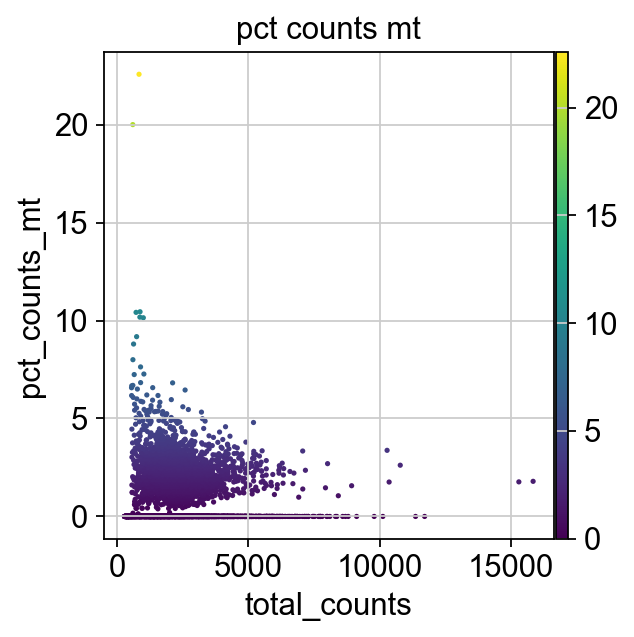

In [51]:
sc.pl.scatter(merged, "total_counts", "pct_counts_mt", color = 'pct_counts_mt', show=False)

In [52]:
sc.tl.rank_genes_groups(merged, 'dataset', method='wilcoxon')

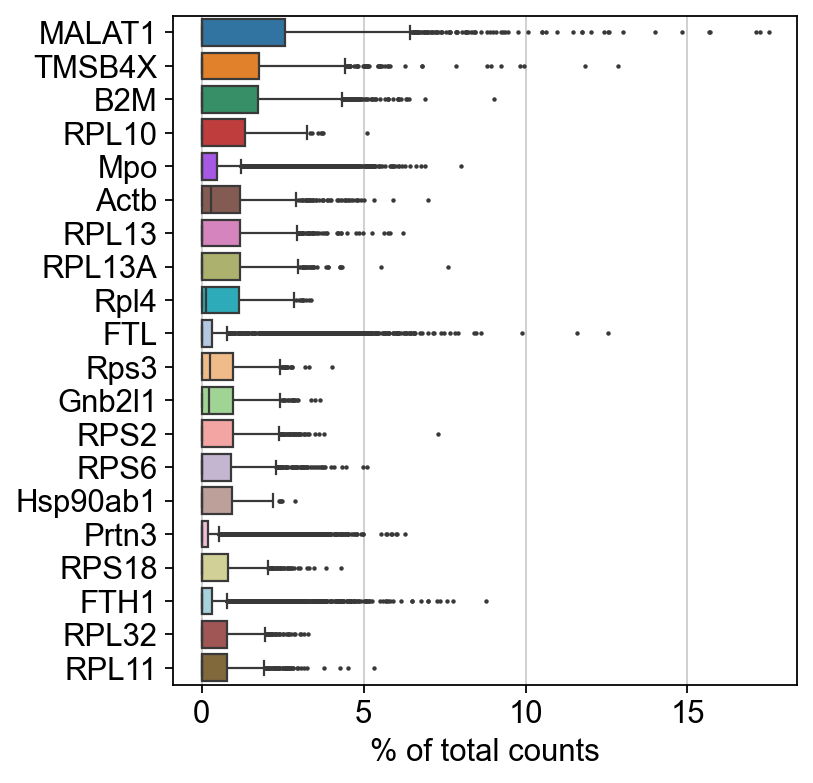

In [53]:
# Plot the top 20 highest expressed genes
sc.pl.highest_expr_genes(merged, n_top=20)

In [54]:
# Write out a list of the valuable highly expressed genes for ease of access in plotting later.
highly_expr_genes = ['MALAT1', 'TMSB4X', 'B2M', 'Mpo', 'Actb', 'FTL','Gnb2l1', 'Prtn3','FTH1']

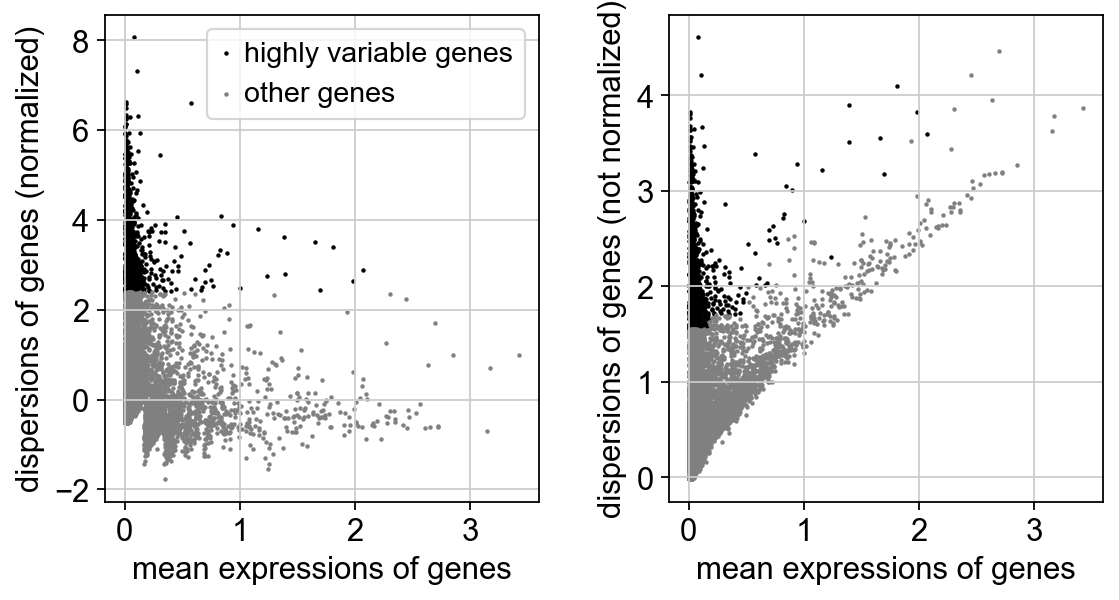

In [55]:
# Log-transform the data
norm = merged.copy()
sc.pp.log1p(norm)
sc.pp.highly_variable_genes(norm, n_top_genes=1000)
sc.pl.highly_variable_genes(norm)

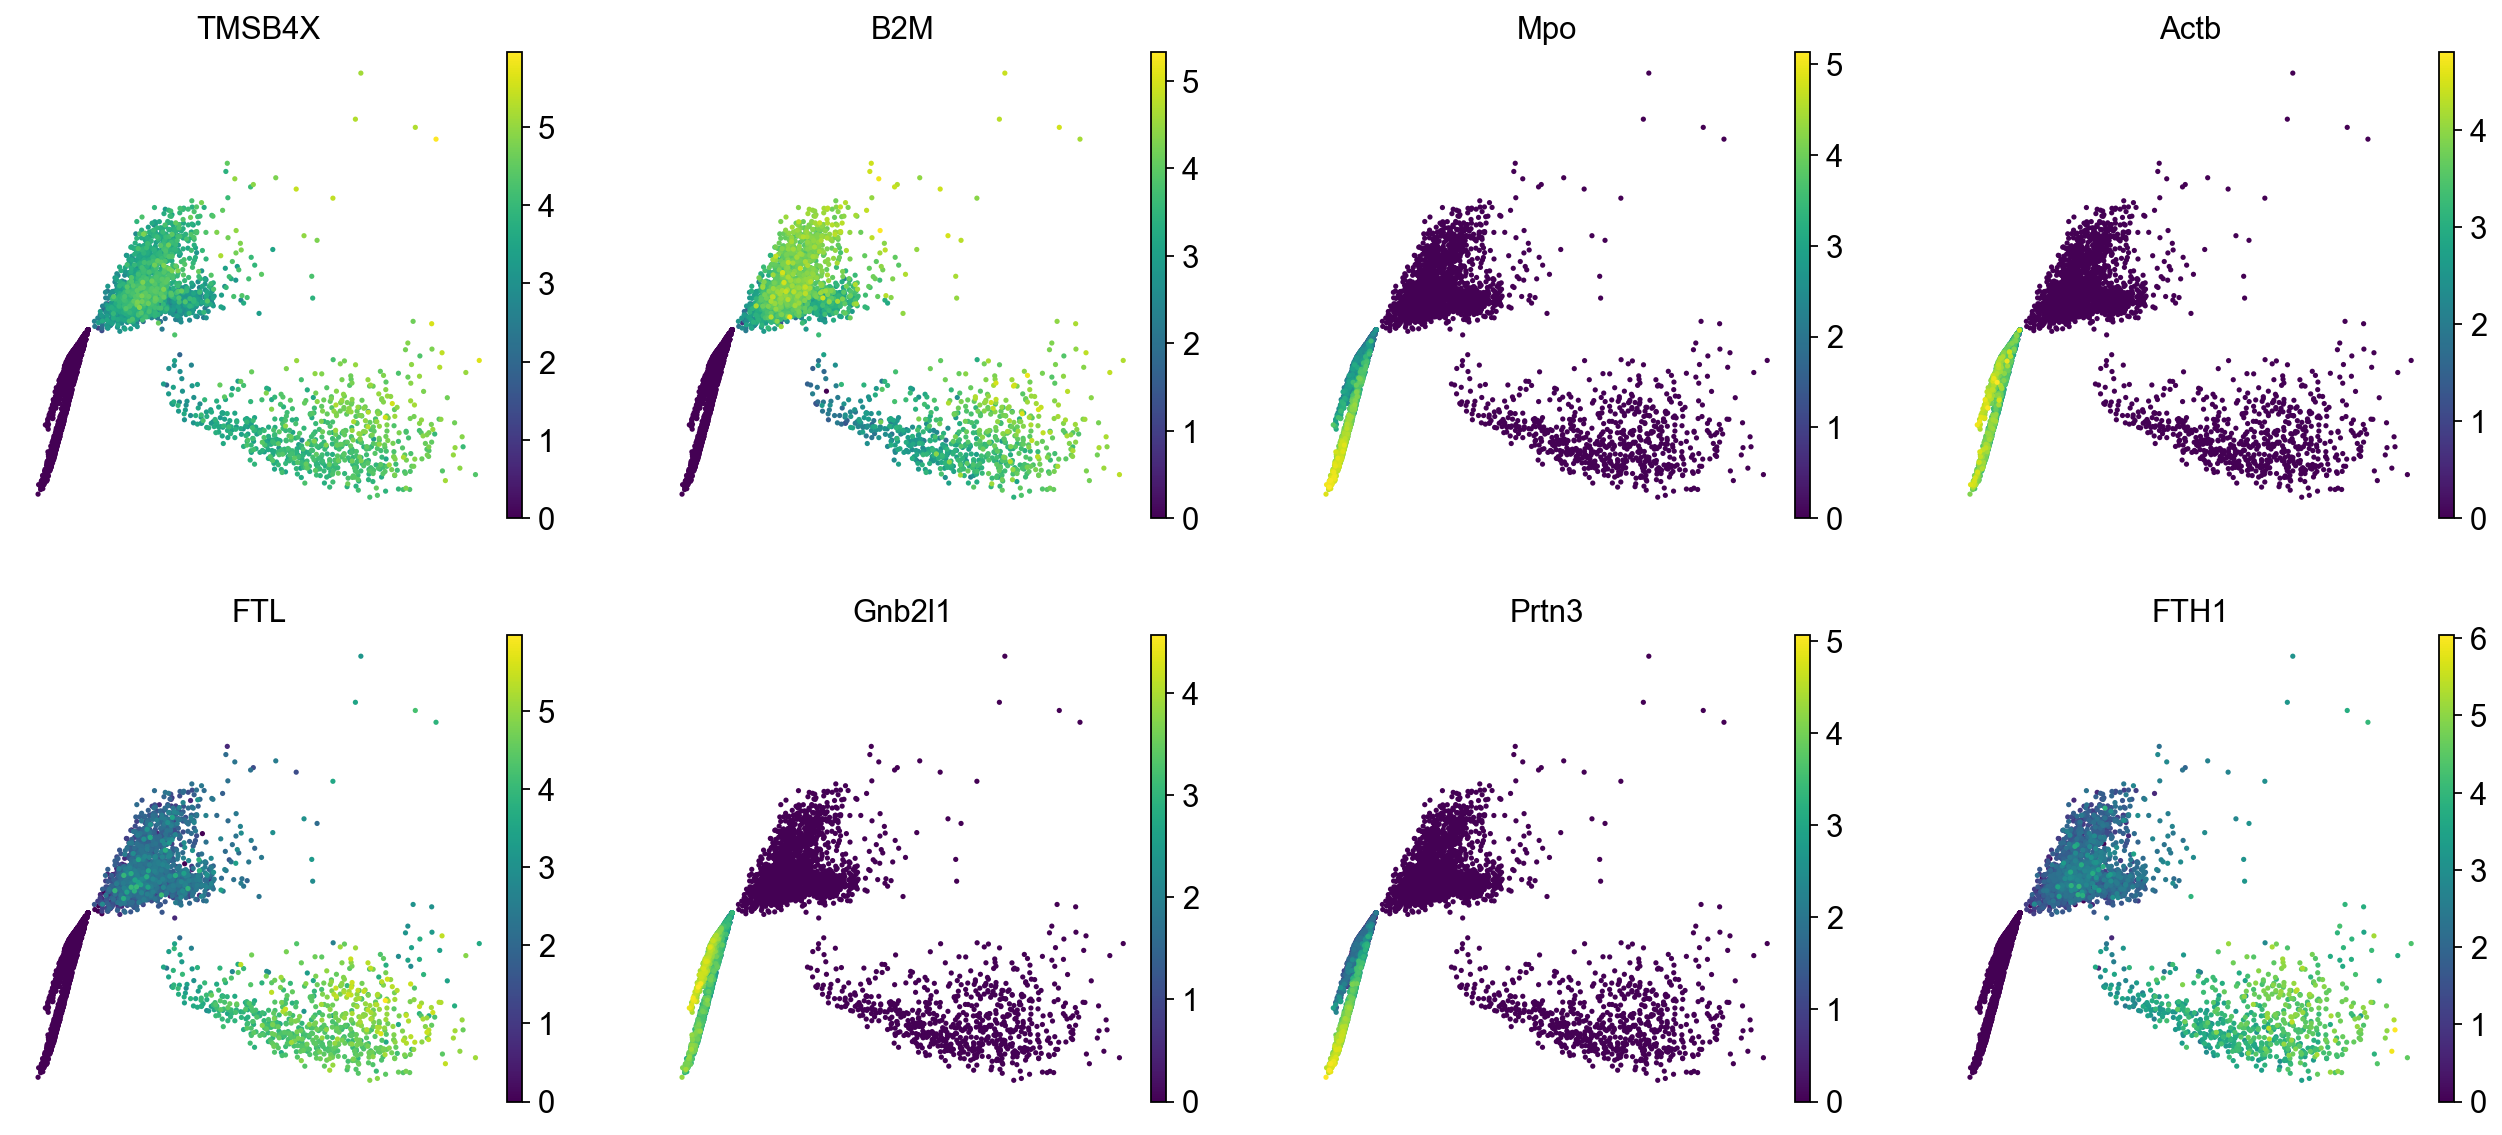

In [57]:
# Calculate PCs and plot the first 5 genes
sc.tl.pca(norm, svd_solver="arpack")
sc.pl.pca(norm, color=highly_expr_genes[1:])

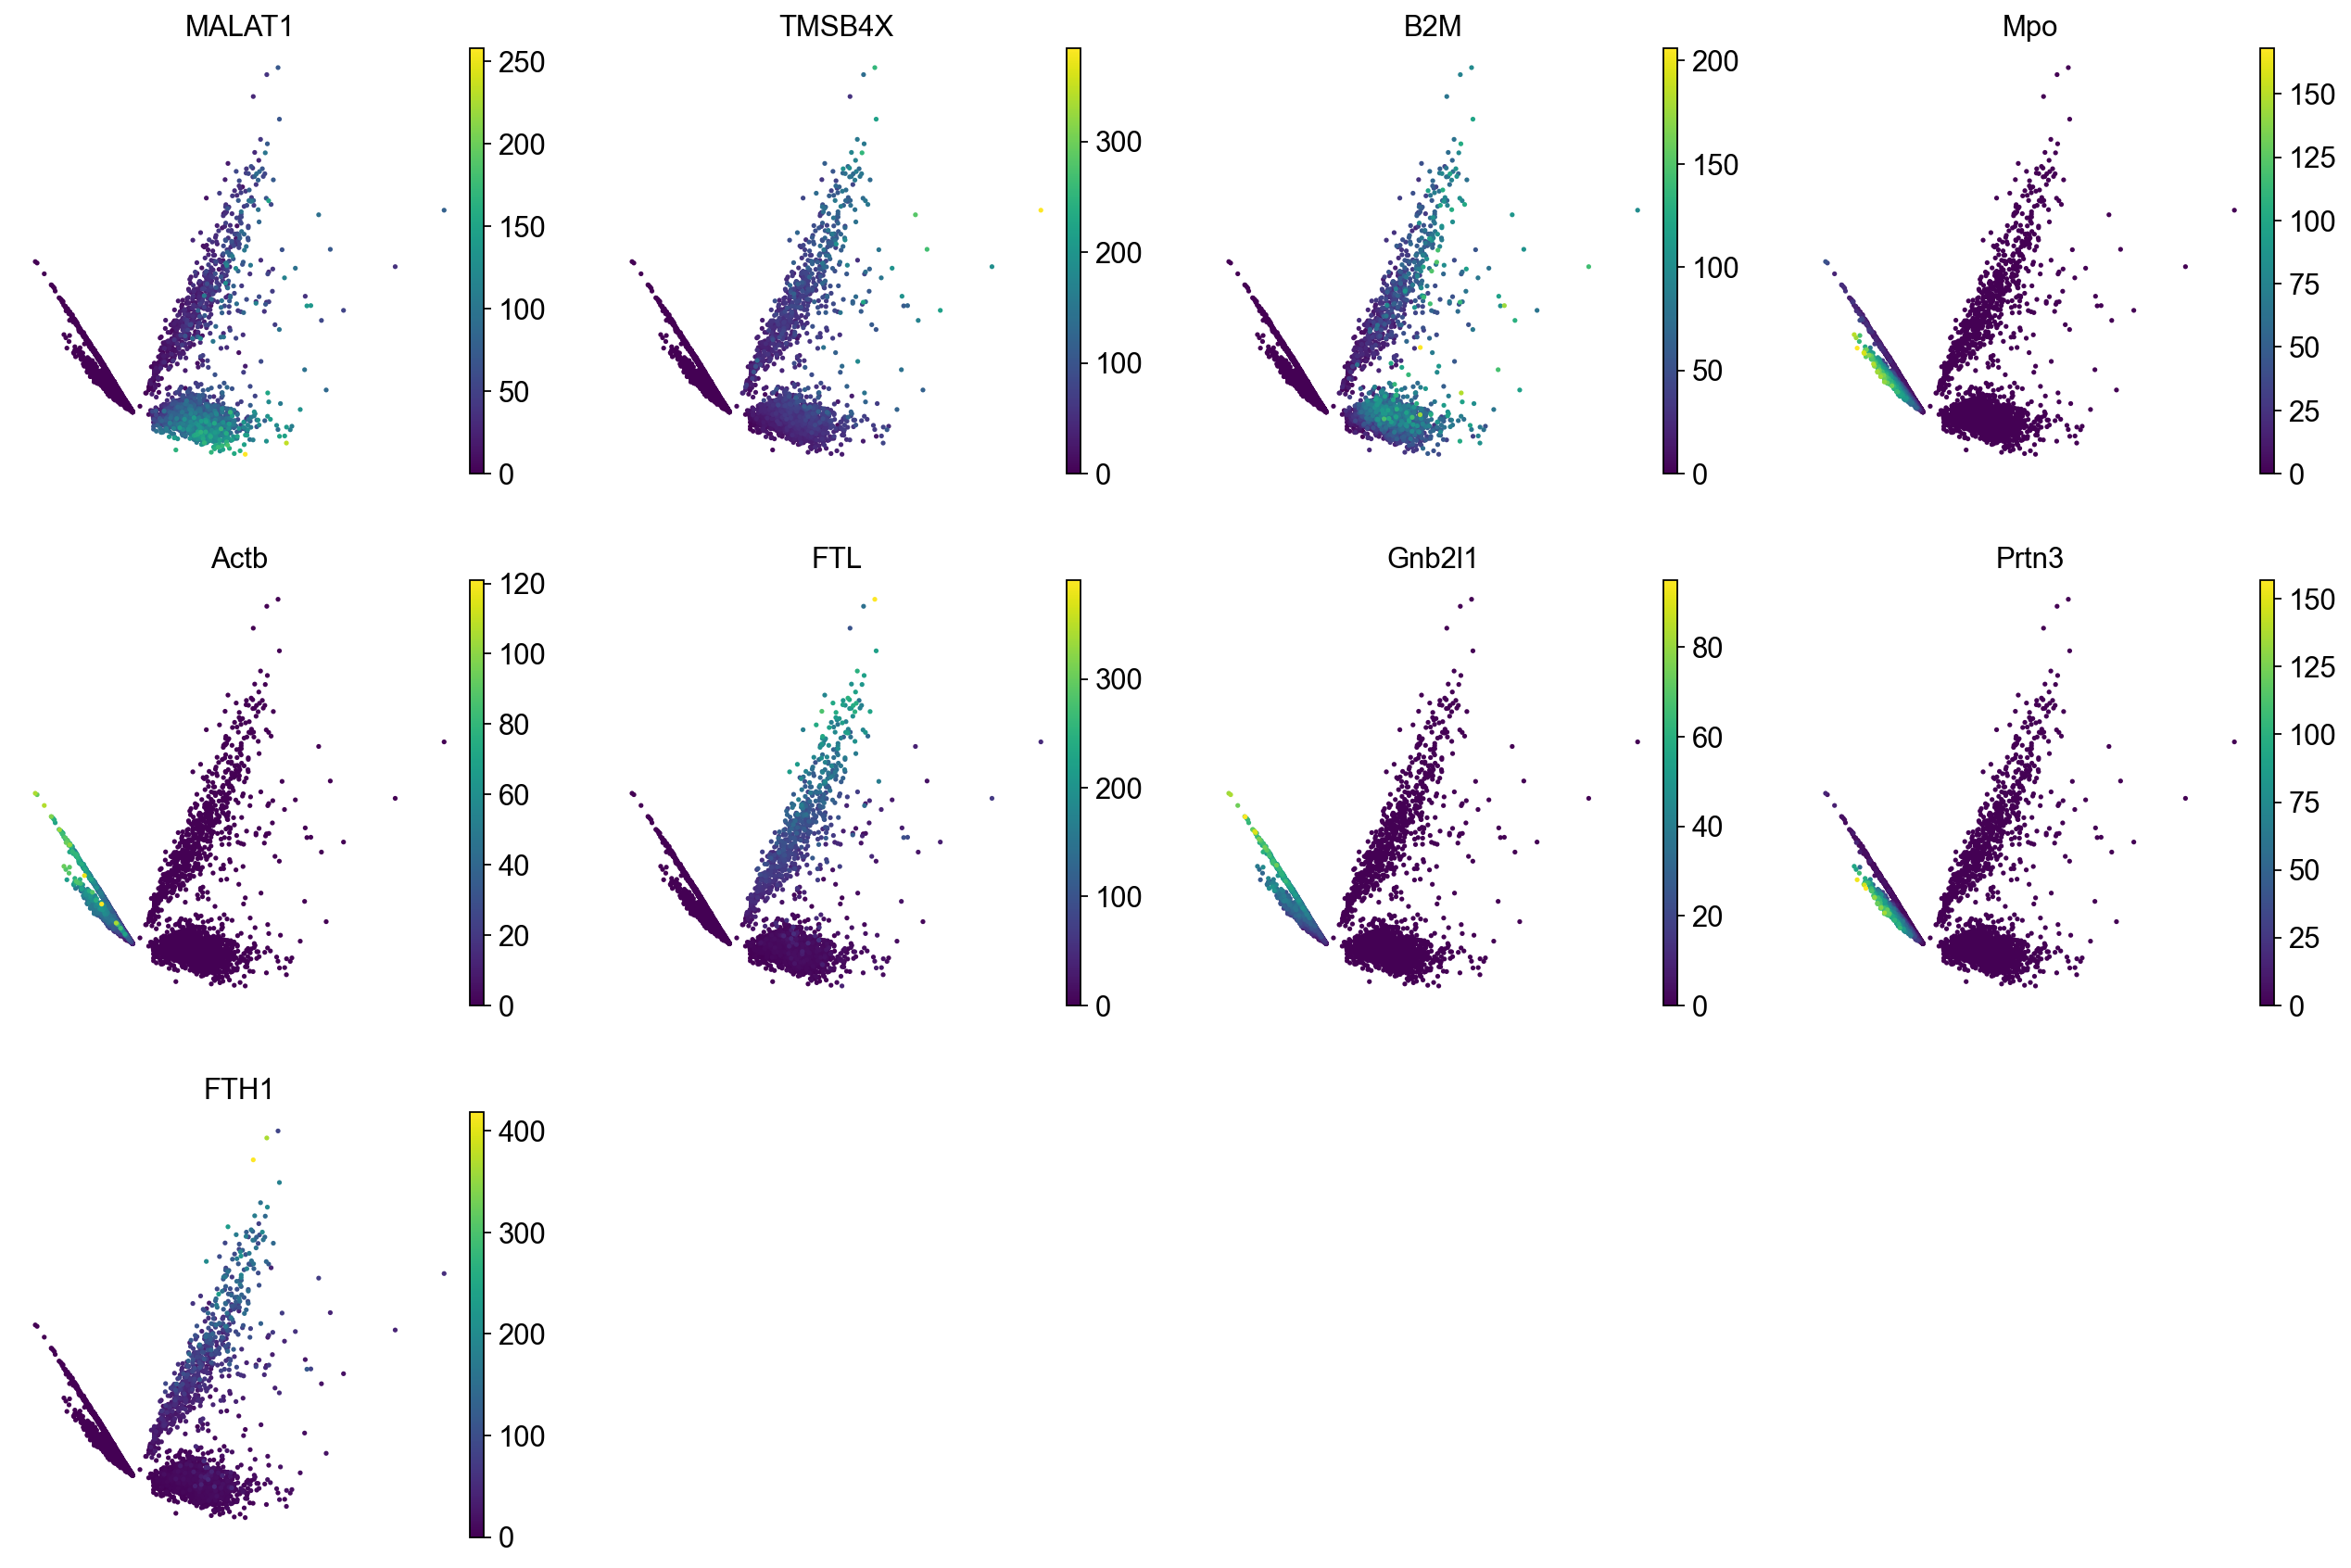

In [58]:
# Calculate PCs and plot the first 5 genes
sc.tl.pca(merged, svd_solver="arpack")
sc.pl.pca(merged, color=highly_expr_genes)

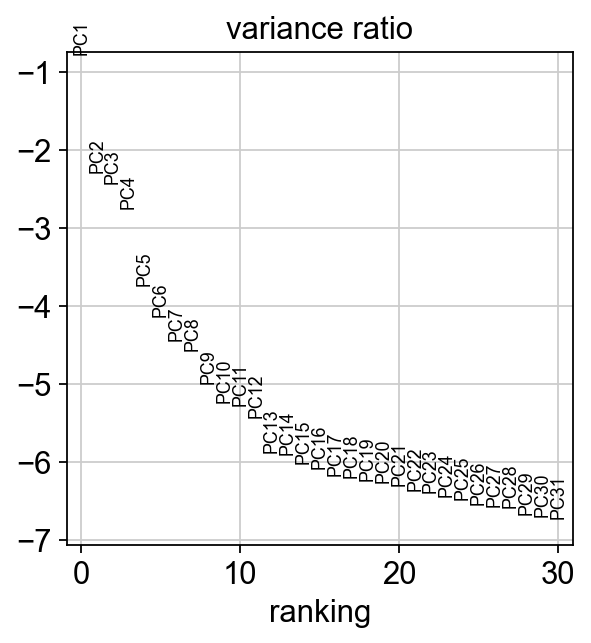

In [59]:
# Look at distribution of PCs
# Note: If you're using your own data, the distribution of PCs might look closer to a logarithmic distribution.
sc.pl.pca_variance_ratio(merged, log=True)

In [60]:
# Preprocess before plotting UMAP
sc.pp.neighbors(merged, n_neighbors=10, n_pcs=40)

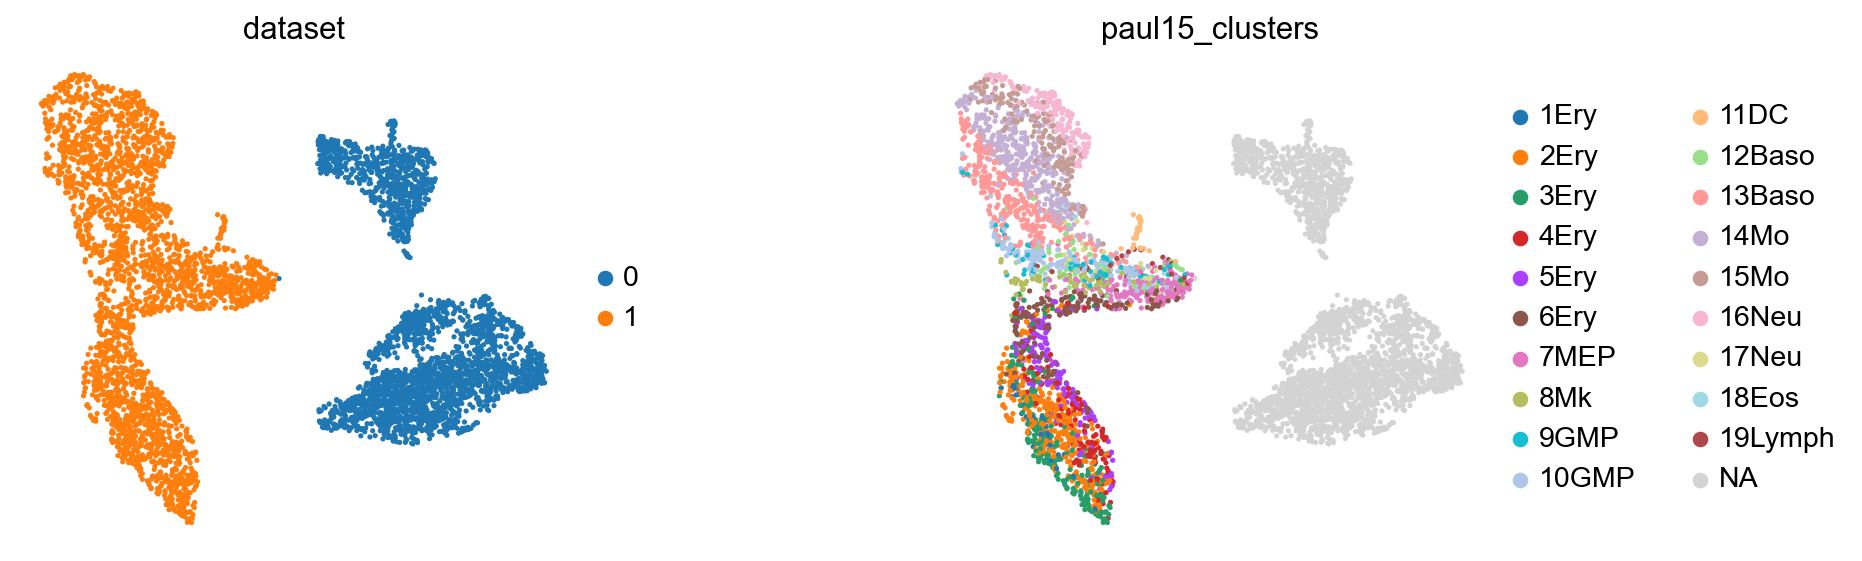

In [61]:
# UMAP plot of shared variables in the merged dataset
sc.tl.umap(merged)
sc.pl.umap(merged, color=[ "dataset", "paul15_clusters"], wspace=.5)

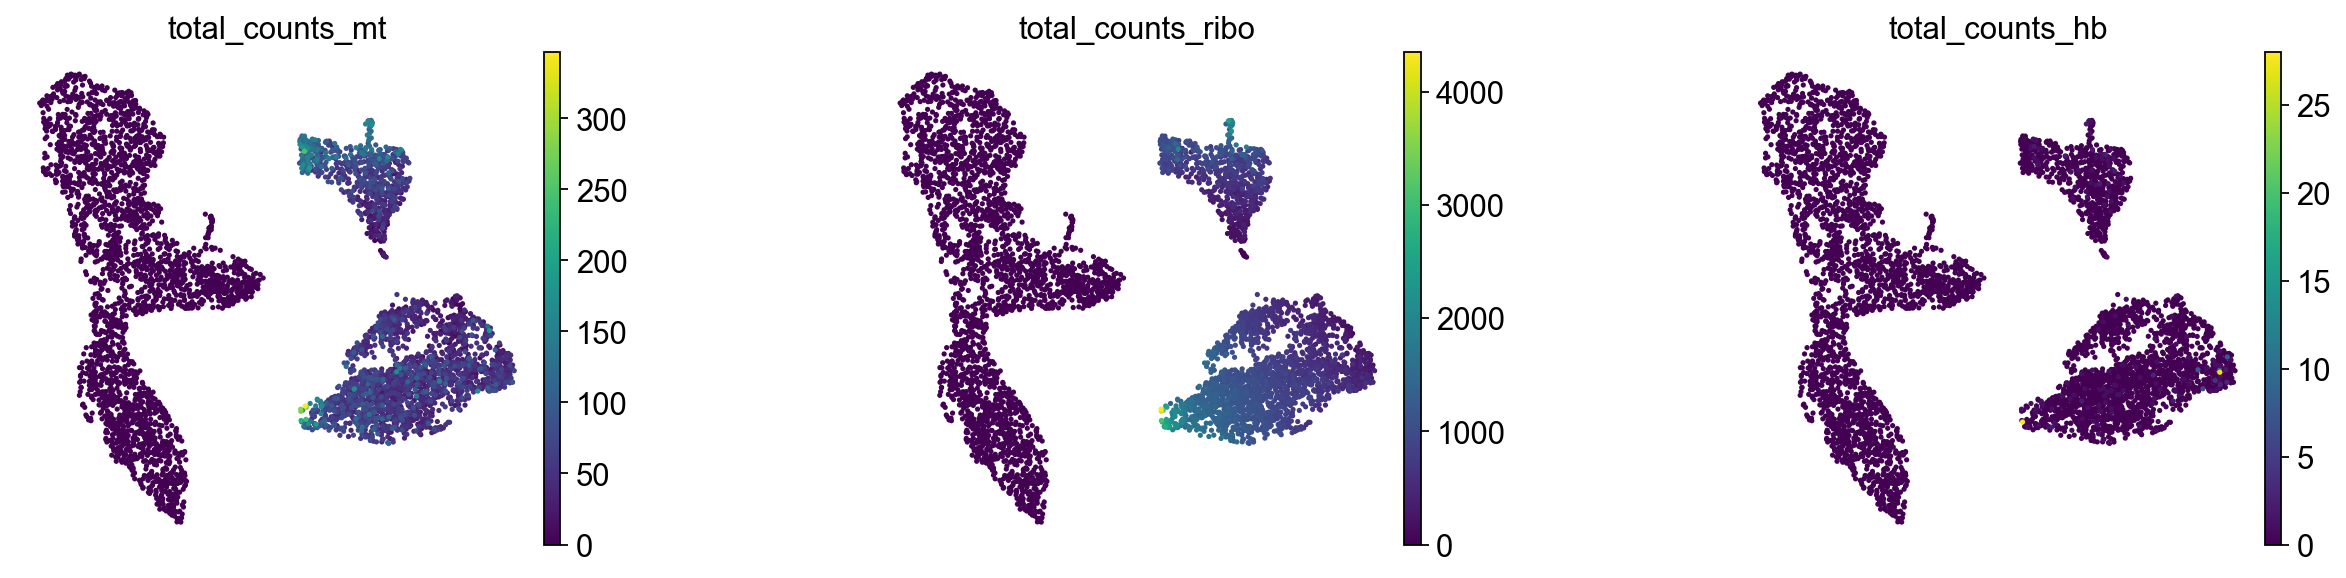

In [62]:
sc.pl.umap(merged, color=[ "total_counts_mt", "total_counts_ribo", "total_counts_hb"], wspace=.5)

Then display the PCA and UMAP calculations to understand where the data is stored.

In [63]:
# To see where PC data is stored:
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.pca.html 
merged.varm['PCs']


array([[-2.65561920e-03,  1.66914784e-03,  2.85677849e-03, ...,
         1.55579891e-04,  1.48613620e-04,  2.12867803e-04],
       [-1.59970257e-03,  1.46363227e-03,  3.23579170e-03, ...,
         3.21345498e-05,  2.90502525e-05, -5.36214981e-07],
       [-8.11170863e-03,  5.43291564e-03,  1.03317268e-02, ...,
         3.63861325e-04,  3.70151072e-04,  4.87336102e-04],
       ...,
       [-1.02273545e-02,  8.84150170e-03,  1.92627104e-02, ...,
         1.02109603e-04,  1.05526119e-04,  3.93017837e-04],
       [-2.87409417e-04, -4.52952318e-06, -1.95617125e-04, ...,
        -2.40826305e-05, -2.84300282e-05, -4.32099860e-05],
       [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00]])

In [64]:
# To see where PC data is stored:
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.pca.html 
merged.obsm['X_pca']

array([[ 1.0935920e+02, -2.8042286e+01,  2.5358393e+01, ...,
        -9.5566626e+00, -2.5167742e+00,  2.6387844e+00],
       [ 2.4705133e+02, -3.5421631e+01,  1.1380985e+02, ...,
        -4.7403355e+00,  1.8079742e+00, -8.0988145e-01],
       [ 1.6178349e+02, -2.7963219e+01,  4.8213509e+01, ...,
        -8.0232916e+00, -8.6822538e+00,  6.5315218e+00],
       ...,
       [-4.8452042e+01, -2.5584888e+01, -5.2311100e+01, ...,
        -5.9096284e-02, -4.4933312e-02, -4.8442874e-02],
       [-1.1615559e+02,  9.7661104e+00, -1.1173096e+00, ...,
         7.4210674e-02,  2.5104016e-02, -7.0304327e-02],
       [-1.7209087e+02,  7.0911621e+01,  1.4732559e+02, ...,
         2.6012117e-01,  2.3863550e-01,  3.1626105e-01]], dtype=float32)

In [65]:
# To see where UMAP data is stored:
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.umap.html
merged.obsm['X_umap']

array([[ 9.547268  ,  0.30083823],
       [ 7.1816487 , -2.4454267 ],
       [10.8369465 , -2.4399095 ],
       ...,
       [ 3.8123274 ,  5.5601    ],
       [-3.3418798 , 15.613433  ],
       [ 0.20166782, -7.2914305 ]], dtype=float32)

## 9. Filter genes with low expression

In [66]:
# Filter genes that are not expressed in any cells
filter = merged.copy()
sc.pp.filter_genes(filter, min_counts=1)
filter

AnnData object with n_obs × n_vars = 5430 × 20076
    obs: 'dataset', 'paul15_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts'
    uns: 'rank_genes_groups', 'pca', 'neighbors', 'umap', 'dataset_colors', 'paul15_clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log1p_norm'
    obsp: 'distances', 'connectivities'

In [67]:
# Filter cells that have less than 250 genes
# n_genes_by_counts is the number of genes detected in each cell
merged_cp = merged[merged.obs['n_genes_by_counts'] > 250, :]
merged_cp

View of AnnData object with n_obs × n_vars = 5381 × 36179
    obs: 'dataset', 'paul15_clusters', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'rank_genes_groups', 'pca', 'neighbors', 'umap', 'dataset_colors', 'paul15_clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'log1p_norm'
    obsp: 'distances', 'connectivities'

##### Subset data by cell type & compare datasets

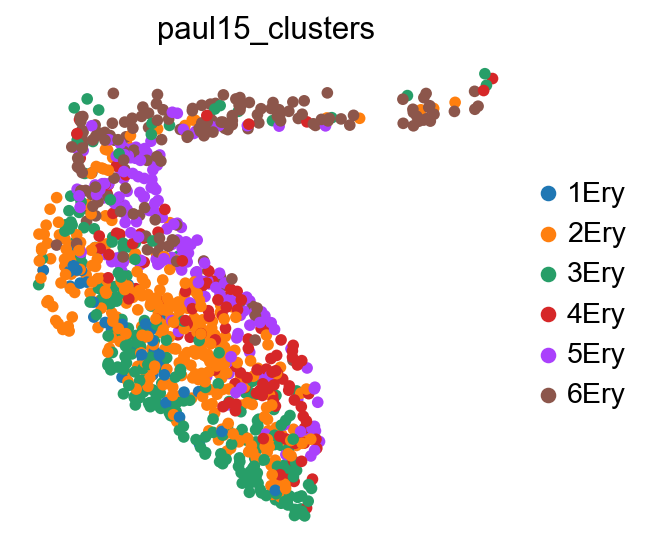

In [68]:
# Choose a category or substring to filter by
# Example: Filter by "Ery"

# 1 - Filter by dataset
paul_df = merged[merged.obs['dataset'].str.contains("1"), :]
# 2 - Filter by desired substring
df = paul_df[paul_df.obs['paul15_clusters'].str.contains("Ery"), :]
# 3 - Plot the UMAP
sc.pl.umap(df, color=['paul15_clusters'], wspace=0.75)


## The End! Congrats on finishing this vignette!
Don't forget to save your environment (see below).

In [69]:
session_info.show(html=False, dependencies=True)

-----
anndata             0.9.1
matplotlib          3.7.2
numpy               1.24.3
pandas              2.0.3
scanpy              1.9.8
scipy               1.10.1
session_info        1.0.0
-----
PIL                         10.0.1
anyio                       NA
appnope                     0.1.2
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.11.0
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
bottleneck                  1.3.5
brotli                      1.0.9
certifi                     2023.11.17
cffi                        1.16.0
charset_normalizer          2.0.4
comm                        0.1.2
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
exceptiongroup              1.2.0
executing                 